# Data trasformation

## Imports

In [31]:
import os

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from src.utils.const import NUM_BINS
from src.utils.const import DATA_DIR
from src.visualization.visualize import histplot

### Useful path to data

In [12]:
ROOT_DIR = os.path.join(os.getcwd(), '..')
PROCESSED_DIR = os.path.join(ROOT_DIR, DATA_DIR, 'processed')

## Reading final dataset

In [13]:
final = pd.read_parquet(
    os.path.join(PROCESSED_DIR, 'final.parquet')
)

### Ground truth discretization

Since we have that the rating mean stays in a continues range between [0.5-5]. We decided to discretize into 10 bins of equal length where every one has a range of 0.45.

In [14]:
final = final.assign(rating_discrete=pd.cut(final.loc[:, 'rating_mean'], bins=NUM_BINS, labels=False))

### Separate train/test/val

In order to try different strategies of normalization and standardization, we need to split the dataset into train, test and validate set. As always suggested, we use the 20% of the dataset for the test and the 10% of the training set, for the validation.

In [22]:
data = final.loc[:, final.columns != 'rating_discrete']
target = final['rating_discrete']
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, stratify=target)
train_data, val_data, train_target, val_target = train_test_split(train_data, train_target, test_size=0.1,
                                                                  stratify=train_target)

## Min-max scaling/standardization evaluation

We first define a function that allows to apply the min-max scaling transformation on the whole dataset.

In [29]:
def min_max_scaling(train_x, val_x, test_x, cols):
    train_x=train_x.copy()
    train_x=train_x.copy()
    train_x=train_x.copy()
    scaler = ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('minmax', MinMaxScaler(), cols)
        ])

    pipe = Pipeline(steps=[
        ('scaler', scaler)
    ])

    pipe.fit(train_x)
    train_data_proc = pipe.transform(train_x)
    val_data_proc = pipe.transform(val_x)
    test_data_proc = pipe.transform(test_x)

    return train_data_proc, val_data_proc, test_data_proc

As we have seen during the lectures, we have to see the distribution of each variable, in order to decide which is the most suitable method.

#### title_length

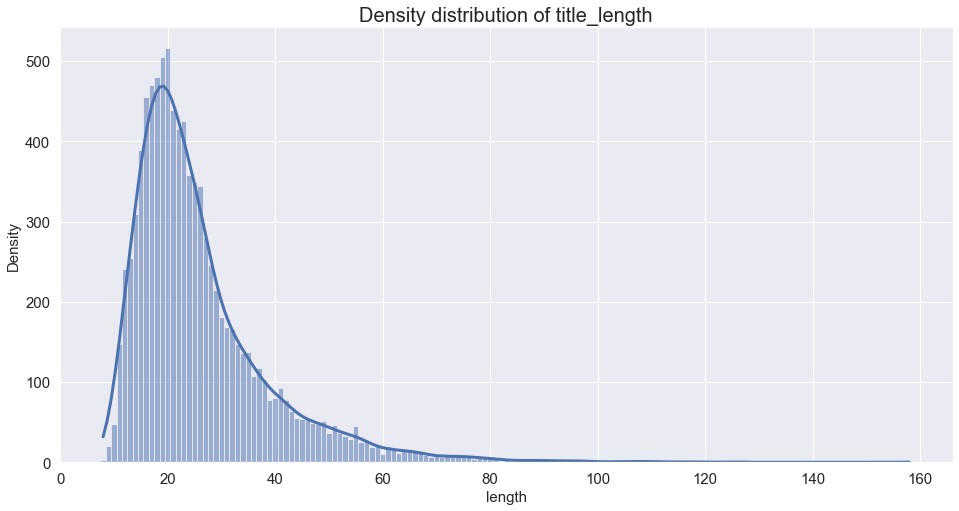

In [26]:
histplot(train_data['title_length'],
         title='Density distribution of title_length',
         xlabel='length',
         ylabel='Density',
         discrete=True,
         kde=True)

The distribution is not gaussian therefore we end up to apply min-max scaling in order to scale values in the range [0,1].

In [33]:
train_data_minmax,val_data_minmax,test_data_minmax=min_max_scaling(train_data,val_data,test_data,['title_length'])

In [38]:
type(train_data)

pandas.core.frame.DataFrame

In [37]:
type(train_data_minmax)

numpy.ndarray

In [35]:
histplot(train_data_minmax['title_length'],
         title='Density distribution of title_length',
         xlabel='length',
         ylabel='Density',
         discrete=True,
         kde=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices